In [1]:
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

# Create a sample data

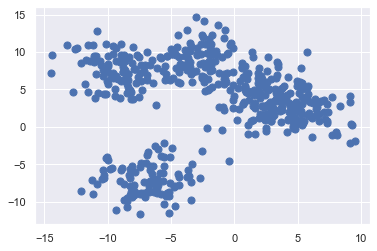

In [21]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=500,
                       centers=5,
                       cluster_std=2.1,
                       random_state=42)
plt.scatter(X[:, 0], X[:, 1], s=50) # X is a numpy array of 2 dim

# Hierarchical Clustering

## draw dendrogram

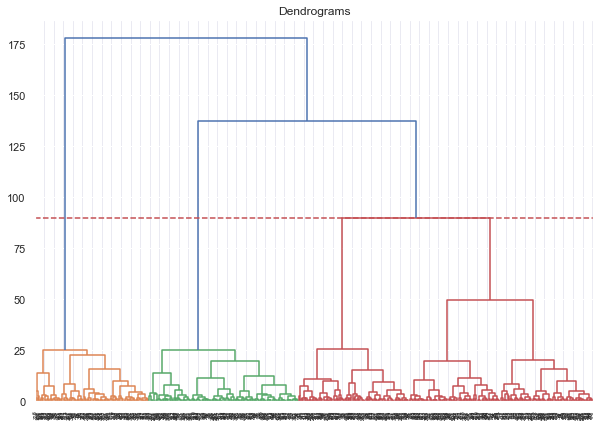

In [27]:
import matplotlib.pyplot as plt

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=90, color='r', linestyle='--')

## Agglomerative Clustering

In [28]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering( n_clusters= 4 , affinity='euclidean', linkage='ward')
cluster_labels = cluster.fit_predict(X)

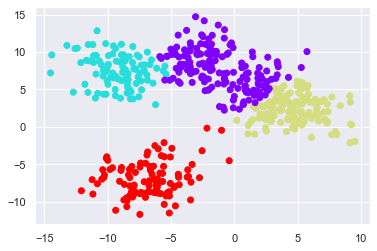

In [29]:
plt.scatter(X[:,0], X[:,1], c=cluster_labels, cmap='rainbow') # X is a numpy array of 2 dim

# DBSCAN

In [30]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X) # standardization

Number of clusters: 2
Outliers : 21


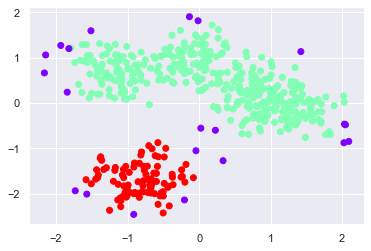

In [36]:
y_pred = DBSCAN(eps=0.3, min_samples=10).fit_predict(X)
import numpy as np
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Outliers :', len(y_pred[np.where(y_pred == -1)]))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='rainbow')

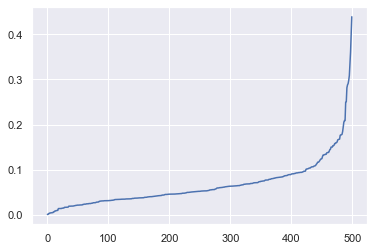

In [37]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)